<a href="https://colab.research.google.com/github/giorgosstath16/AIDL_01/blob/main/Giorgos_Stathakopoulos_ML_regression_(mscaidl_0033).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Fires in Greece from NASA satellite data.

ML regression for confidence approximation of an event.

 Regression instead of classification was selected as it can be a sorting problem for goverment officials

Depending the number of available QRF's (quick response forces), we can adjust the threshold of the go/no go act after sorning the confidence of each event.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#load the dataset from kaggle
from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

%cd /content/drive/MyDrive/Kaggle

!kaggle datasets download -d brsdincer/2000-2021-tunisiaisraelgreeceitaly-nasa

Mounted at /content/drive
/content/drive/MyDrive/Kaggle
  0% 0.00/2.86M [00:00<?, ?B/s]
100% 2.86M/2.86M [00:00<00:00, 39.5MB/s]


In [ ]:
#unzip the file
!unzip \2000-2021-tunisiaisraelgreeceitaly-nasa.zip  -d \2000-2021-tunisiaisraelgreeceitaly-nasa && rm *.zip  

Archive:  2000-2021-tunisiaisraelgreeceitaly-nasa.zip
  inflating: 2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/GREECE_2000_2021 - fire_archive_M-C61_214279.csv  
  inflating: 2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/ISRAEL_2000_2021 - fire_archive_M-C61_214285.csv  
  inflating: 2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/ITALY_2000_2021 - fire_archive_M-C61_214280.csv  
  inflating: 2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/TUNISIA_2000_2021_M-C61_214281.csv  


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle/2000-2021-tunisiaisraelgreeceitaly-nasa/2000_2021_PICK_COUNTRIES/GREECE_2000_2021 - fire_archive_M-C61_214279.csv")
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,39.0664,22.4310,308.5,1.2,1.1,2000-11-01,953,Terra,MODIS,66,6.03,294.9,5.7,D,0.0
1,38.6703,22.5078,312.2,1.2,1.1,2000-11-01,953,Terra,MODIS,72,6.03,297.9,8.2,D,0.0
2,40.8941,21.4627,307.4,1.1,1.0,2000-11-01,953,Terra,MODIS,60,6.03,288.3,7.5,D,0.0
3,41.2814,26.2883,303.0,1.2,1.1,2000-11-03,940,Terra,MODIS,51,6.03,292.1,5.5,D,0.0
4,39.9170,22.5219,302.0,1.0,1.0,2000-11-03,941,Terra,MODIS,47,6.03,290.7,4.1,D,0.0


In [ ]:
df.daynight.value_counts()

D    32170
N     6870
Name: daynight, dtype: int64

In [ ]:
df.satellite.value_counts()

Aqua     20755
Terra    18285
Name: satellite, dtype: int64

In [ ]:
df.instrument.value_counts()

MODIS    39040
Name: instrument, dtype: int64

In [ ]:
df.version.value_counts()

6.03      37177
6.1NRT     1863
Name: version, dtype: int64

In [ ]:
df['type'].value_counts()

0.0    35625
2.0     1331
3.0      221
Name: type, dtype: int64

Text(0.5, 1.0, 'Forest fires in Greece depended on brightness and confidence of data')

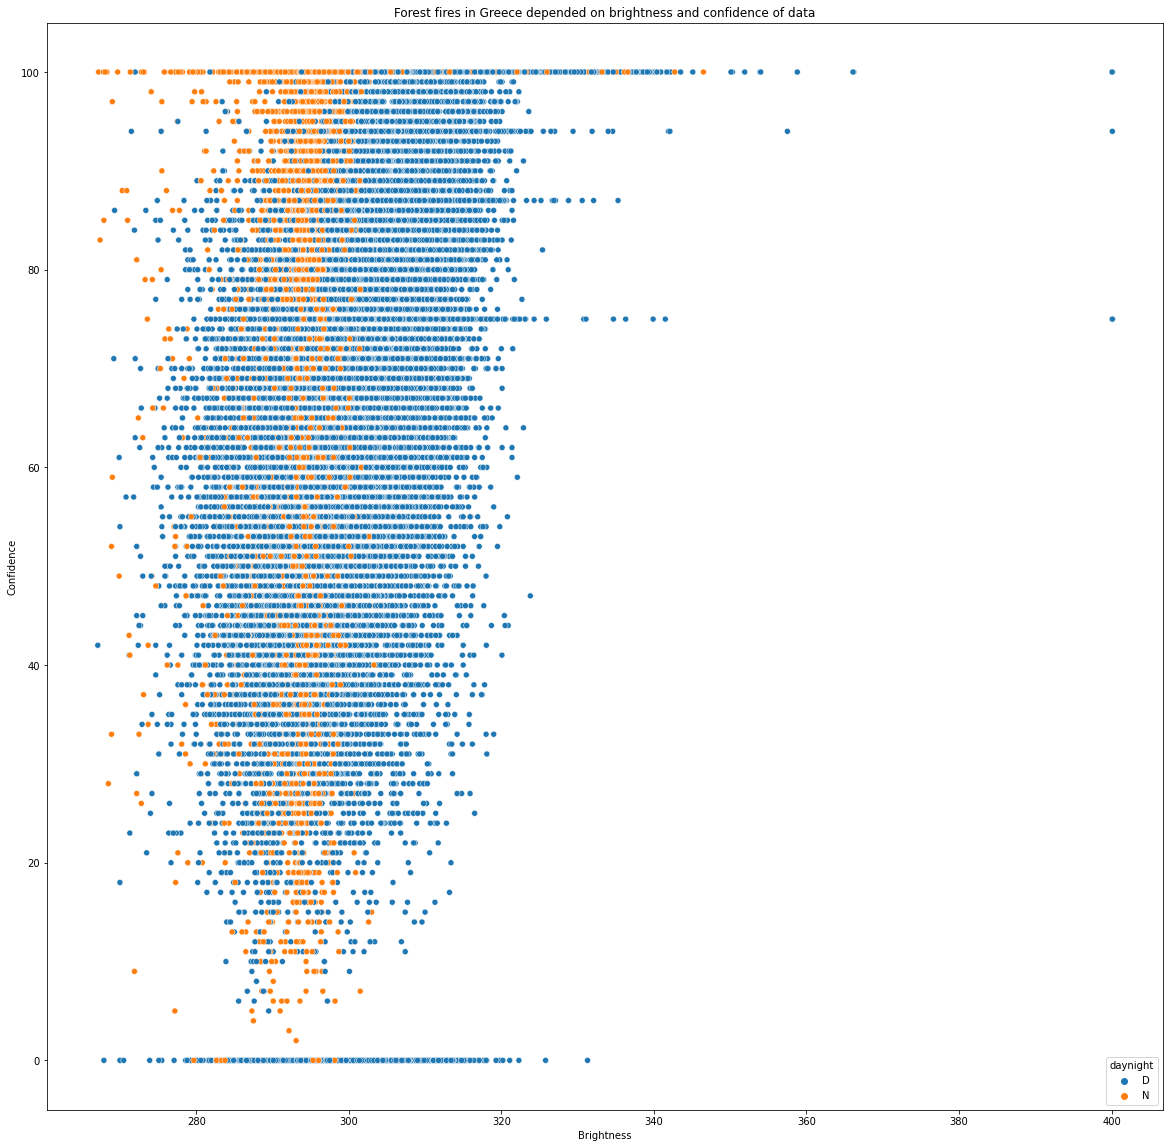

In [5]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='bright_t31',y='confidence',data=df, hue ='daynight',palette='tab10') 
plt.xlabel('Brightness')
plt.ylabel('Confidence')
plt.title('Forest fires in Greece depended on brightness and confidence of data')

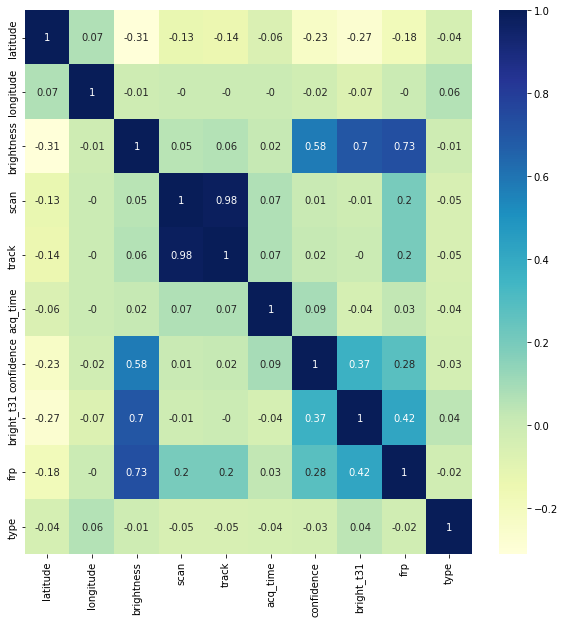

In [7]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True,cmap="YlGnBu")

In [ ]:
# one-hot-encoding on object values and erase object columns
cols = ['satellite','daynight','version']

for i in cols:
  df_temp = pd.get_dummies(df[i], prefix=i)
  df = pd.concat([df, df_temp], axis=1)
  df = df.drop(columns=[i])

df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,instrument,confidence,bright_t31,frp,type,satellite_Aqua,satellite_Terra,daynight_D,daynight_N,version_6.03,version_6.1NRT
0,39.0664,22.4310,308.5,1.2,1.1,2000-11-01,953,MODIS,66,294.9,5.7,0.0,0,1,1,0,1,0
1,38.6703,22.5078,312.2,1.2,1.1,2000-11-01,953,MODIS,72,297.9,8.2,0.0,0,1,1,0,1,0
2,40.8941,21.4627,307.4,1.1,1.0,2000-11-01,953,MODIS,60,288.3,7.5,0.0,0,1,1,0,1,0
3,41.2814,26.2883,303.0,1.2,1.1,2000-11-03,940,MODIS,51,292.1,5.5,0.0,0,1,1,0,1,0
4,39.9170,22.5219,302.0,1.0,1.0,2000-11-03,941,MODIS,47,290.7,4.1,0.0,0,1,1,0,1,0


In [ ]:
df.isnull().sum()

latitude           0
longitude          0
brightness         0
scan               0
track              0
acq_date           0
acq_time           0
instrument         0
confidence         0
bright_t31         0
frp                0
type               0
satellite_Aqua     0
satellite_Terra    0
daynight_D         0
daynight_N         0
version_6.03       0
version_6.1NRT     0
dtype: int64

In [ ]:
df['type'] = df['type'].fillna(method='ffill')

In [ ]:
X = df[['latitude','longitude','brightness','scan','track','acq_time','bright_t31','frp','type','satellite_Aqua','satellite_Terra','daynight_D','daynight_N','version_6.03','version_6.1NRT']]
y = df['confidence']

print('X shape is:', X.shape)
print('y shape is:', y.shape)

X shape is: (39040, 15)
y shape is: (39040,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

sklearn_rfg = RandomForestRegressor(
    n_estimators=10, 
    criterion='squared_error', 
    max_depth=1
)
sklearn_rfg.fit(X_train, y_train)
y_predict = sklearn_rfg.predict(X_test)

In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test,y_predict))

Mean Absolute Error (MAE): 12.789484638302447


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
# fit model
model.fit(X_test, y_test)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

[16:26:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean MAE: 8.606 (0.314)


In [ ]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor

# define the model
model = BaggingRegressor()
# fit the model on the whole dataset
model.fit(X_train, y_train)
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -8.954 (0.395)
